<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       8002 non-null   int64         
 1   name                     7548 non-null   object        
 2   date                     8002 non-null   datetime64[ns]
 3   manner_of_death          8002 non-null   object        
 4   armed                    7791 non-null   object        
 5   age                      7499 non-null   float64       
 6   gender                   7971 non-null   object        
 7   race                     6485 non-null   object        
 8   city                     8002 non-null   object        
 9   state                    8002 non-null   object        
 10  signs_of_mental_illness  8002 non-null   bool          
 11  threat_level             8002 non-null   object        
 12  flee                     7036 non-

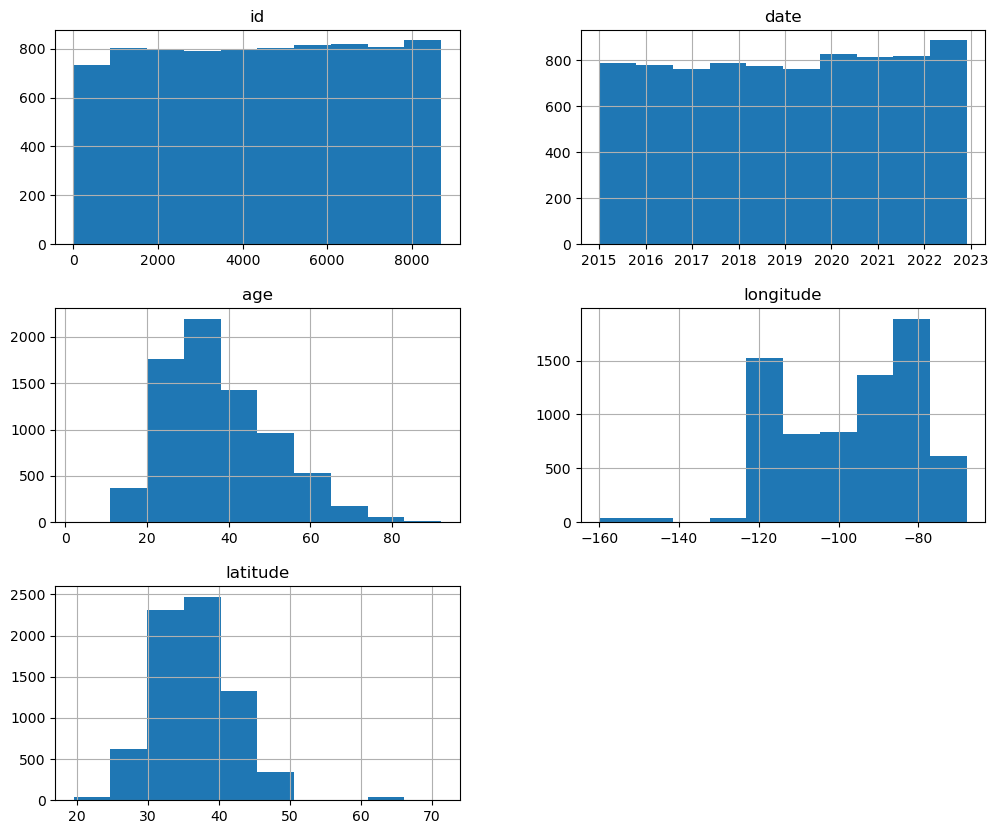

C:\Users\Hp\AppData\Local\Temp\ipykernel_20652\3721577642.py:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


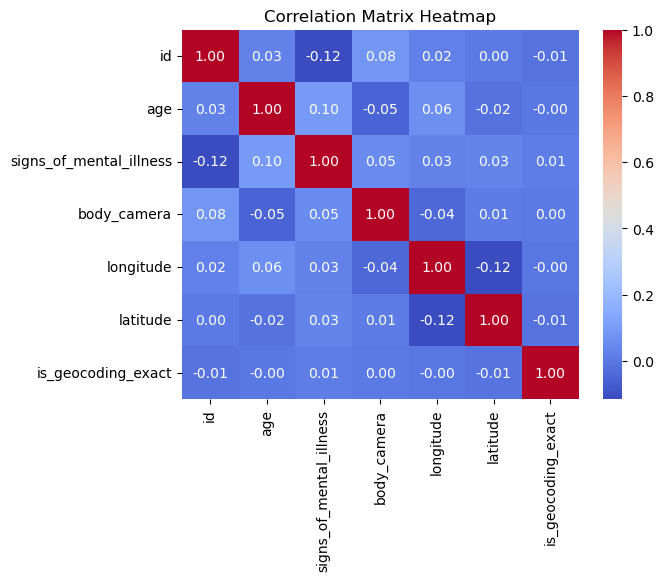

In [1]:
!pip install xlrd

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Load the dataset from Excel
excel_file_path = 'C:/Users/Hp/Downloads/fatal-police-shootings-data (4).xls'  
df = pd.read_excel(excel_file_path)

# Display basic information about the DataFrame
print(df.info())

# Display basic statistics
print(df.describe())

# Plot histograms for numerical columns
df.hist(figsize=(12, 10))
plt.show()

# Plot correlation matrix heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
# Load the dataset from Excel
excel_file_path = 'C:/Users/Hp/Downloads/fatal-police-shootings-data.xls'  # Replace with the actual path to your Excel file
df = pd.read_excel(excel_file_path)

# Assuming df is your DataFrame
df = df.dropna()  # Drop rows with missing values

X = df[['age', 'longitude', 'latitude']]
y = df['is_geocoding_exact']

# Check for and handle infinite values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = X.dropna()

X = sm.add_constant(X)  # Add a constant term to the independent variables

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     is_geocoding_exact   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8158
Date:                Sun, 12 Nov 2023   Prob (F-statistic):              0.485
Time:                        16:06:28   Log-Likelihood:                 9113.7
No. Observations:                5179   AIC:                        -1.822e+04
Df Residuals:                    5175   BIC:                        -1.819e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9955      0.005    185.602      0.0

C:\Users\Hp\AppData\Local\Temp\ipykernel_20652\2720163291.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Assuming df is your DataFrame
X = df[['age', 'longitude', 'latitude']]
y = df['is_geocoding_exact']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
features = ['age', 'longitude', 'latitude']
X = df[features]

# Standardize the data
X_std = StandardScaler().fit_transform(X)

pca = PCA()
pca_result = pca.fit_transform(X_std)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
X = df[['age', 'longitude', 'latitude']]

kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(X)

plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis')
plt.show()


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [18]:
import numpy as np

# Assuming df is your DataFrame
age_sample = df['age'].sample(frac=0.8, replace=True)

# Bootstrap resampling
bootstrap_means = [age_sample.sample(frac=1, replace=True).mean() for _ in range(1000)]

# Confidence interval
conf_int = np.percentile(bootstrap_means, [2.5, 97.5])
print("Bootstrapped 95% Confidence Interval for Age Mean:", conf_int)


Bootstrapped 95% Confidence Interval for Age Mean: [36.58422243 37.21003149]


In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame
X = df[['age', 'longitude', 'latitude']]
y = df['is_geocoding_exact']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


ValueError: Input X contains NaN.
MLPClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a 'date' column
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Plot time series data
plt.plot(df.index, df['age'])
plt.xlabel('Date')
plt.ylabel('Age')
plt.show()


KeyError: 'date'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(8, 6))
sns.countplot(x='manner_of_death', data=df)
plt.title('Number of People Shot')
plt.xlabel('Manner of Death')
plt.ylabel('Count')
plt.show()


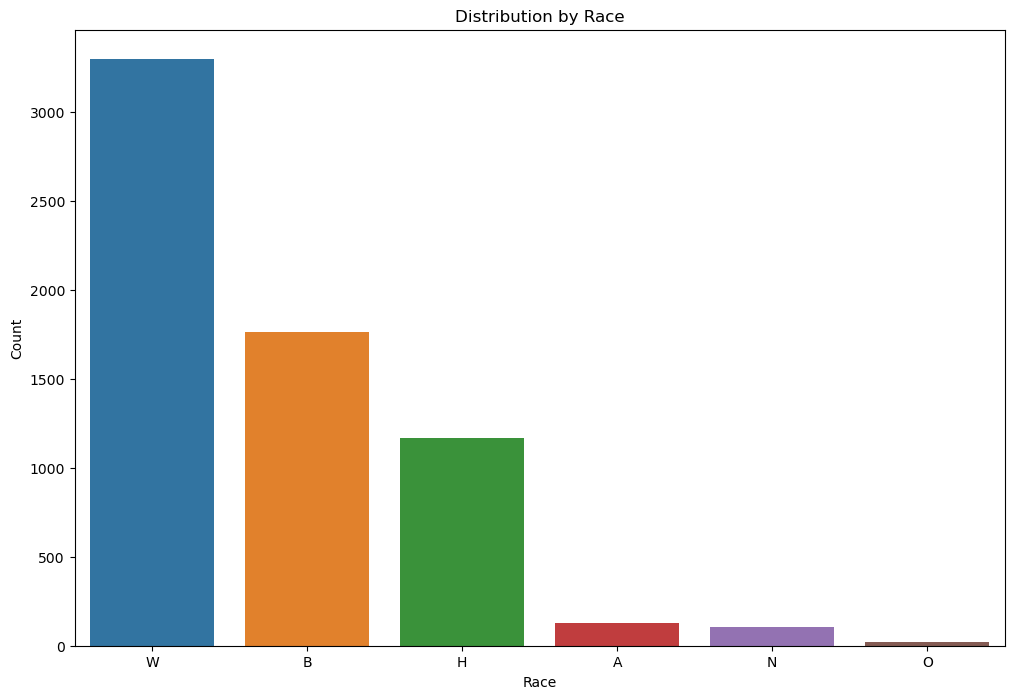

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(x='race', data=df, order=df['race'].value_counts().index)
plt.title('Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()


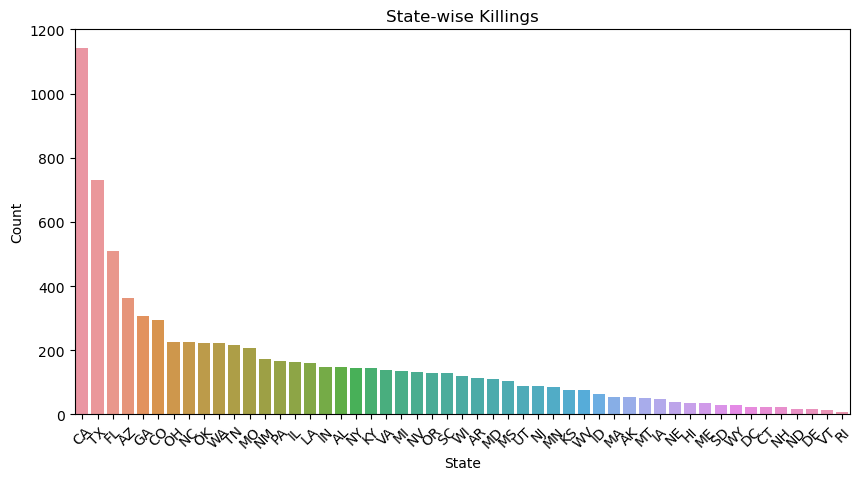

In [55]:
plt.figure(figsize=(10, 5))
sns.countplot(x='state', data=df, order=df['state'].value_counts().index)
plt.title('State-wise Killings')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1134: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_data.insert(0, var, comp_col)


ValueError: cannot reindex on an axis with duplicate labels

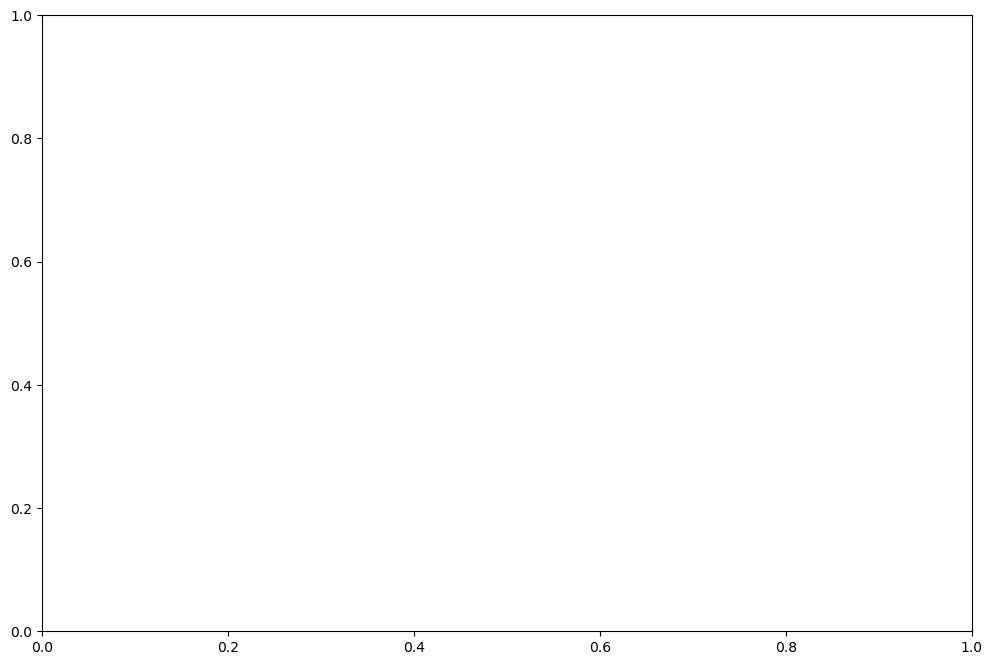

In [23]:
plt.figure(figsize=(12, 8))
sns.histplot(x='age', hue='gender', data=df, bins=20, kde=True)
plt.title('Age and Gender Breakdown')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


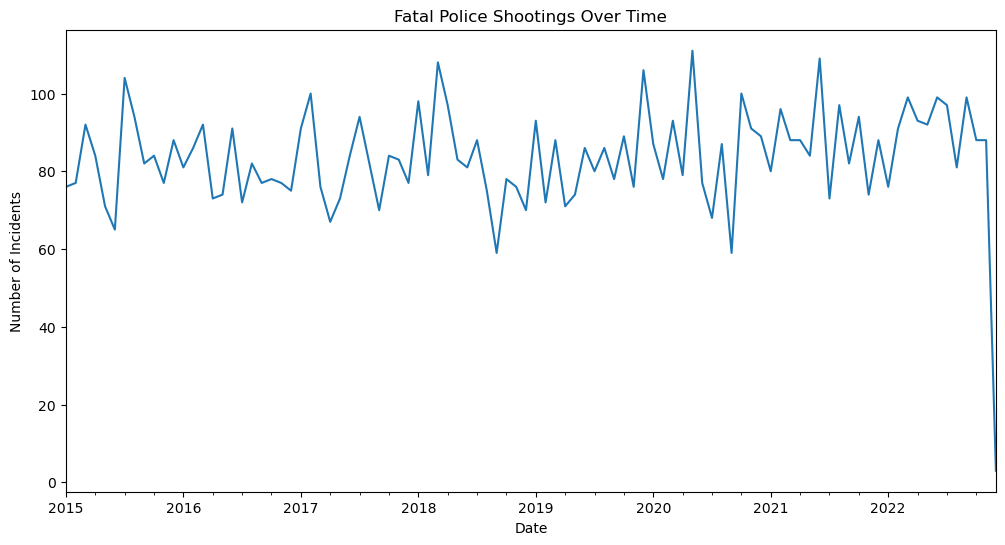

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset from Excel
excel_file_path = 'C:/Users/Hp/Downloads/fatal-police-shootings-data (4).xls'  # Replace with the actual path to your Excel file
df= pd.read_excel(excel_file_path)


df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Plot the number of fatal shootings over time
plt.figure(figsize=(12, 6))
df.resample('M').size().plot()
plt.title('Fatal Police Shootings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.show()


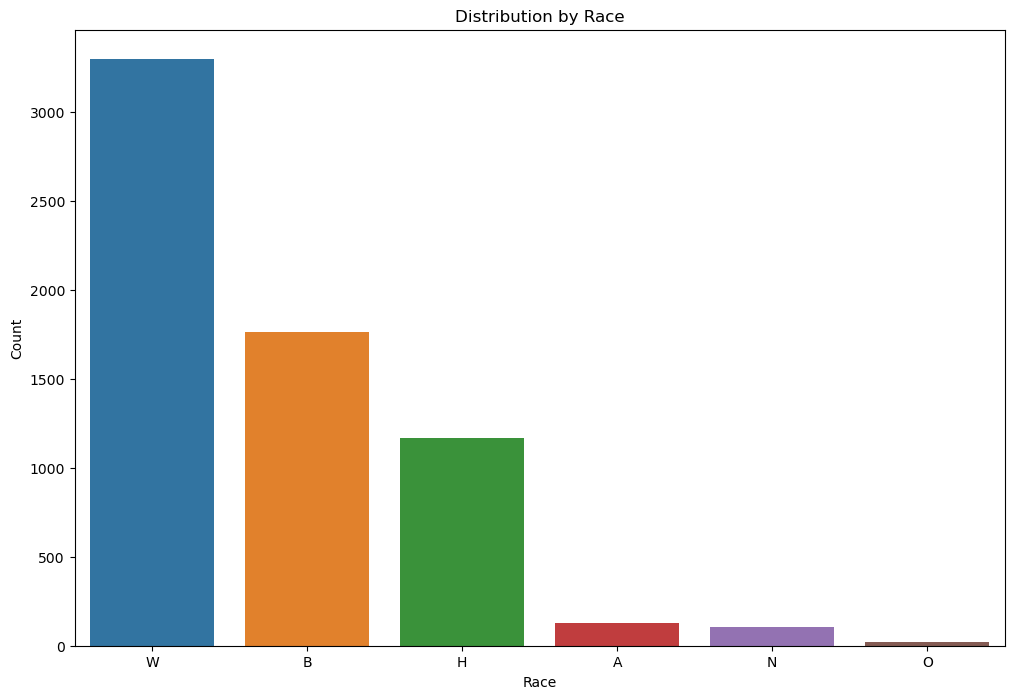

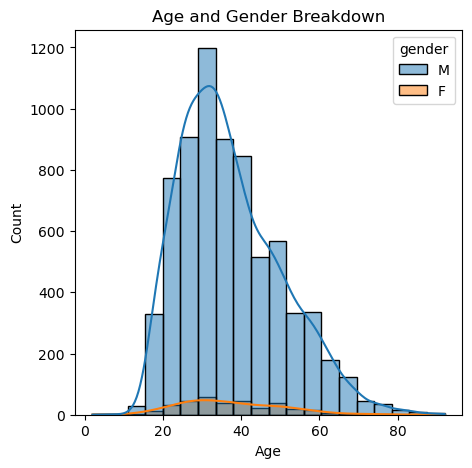

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
excel_file_path = 'C:/Users/Hp/Downloads/fatal-police-shootings-data (4).xls'  # Replace with the actual path to your Excel file
df= pd.read_excel(excel_file_path)
# Distribution by race
plt.figure(figsize=(12, 8))
sns.countplot(x='race', data=df, order=df['race'].value_counts().index)
plt.title('Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

# Age and gender brekdown
plt.figure(figsize=(5, 5))
sns.histplot(x='age', hue='gender', data=df, bins=20, kde=True)
plt.title('Age and Gender Breakdown')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()




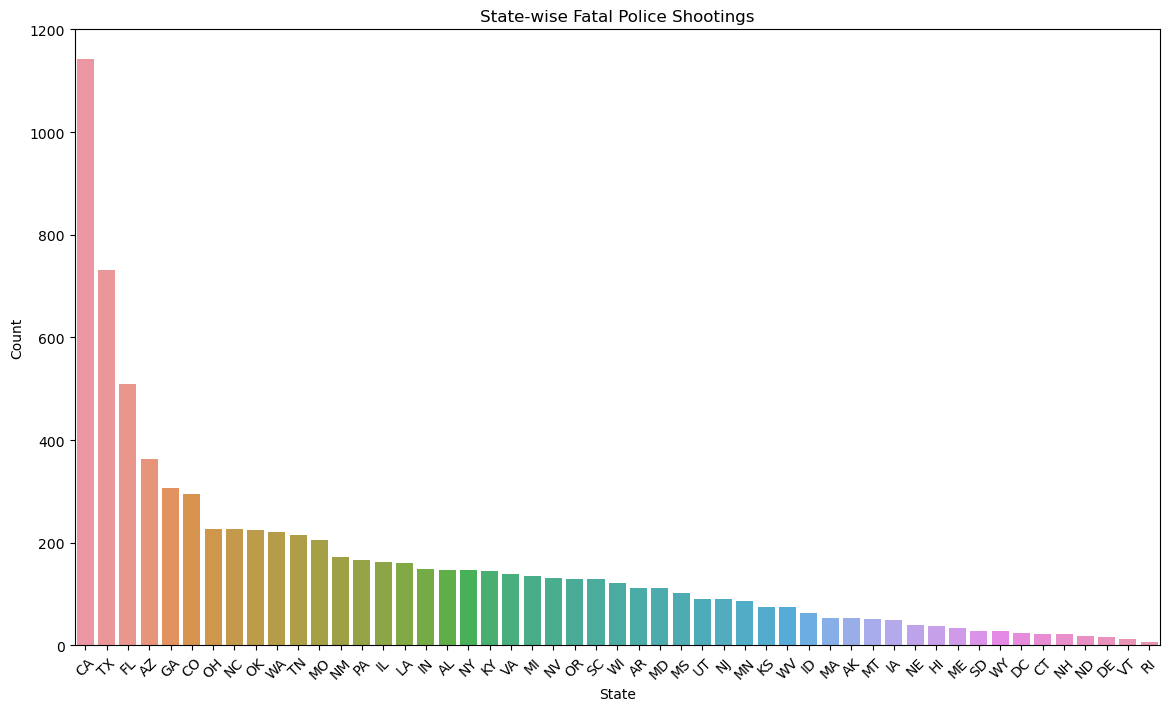

In [29]:
plt.figure(figsize=(14, 8))
sns.countplot(x='state', data=df, order=df['state'].value_counts().index)
plt.title('State-wise Fatal Police Shootings')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


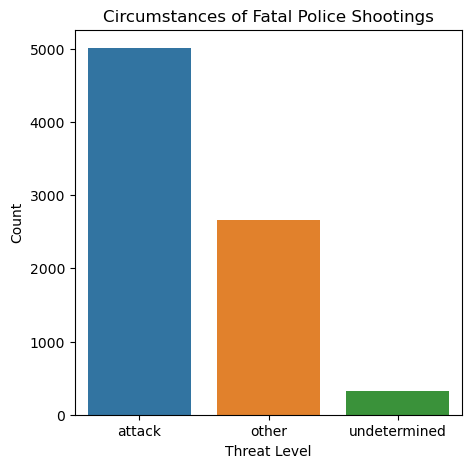

In [64]:
plt.figure(figsize=(5, 5))
sns.countplot(x='threat_level', data=df)
plt.title('Circumstances of Fatal Police Shootings')
plt.xlabel('Threat Level')
plt.ylabel('Count')
plt.show()


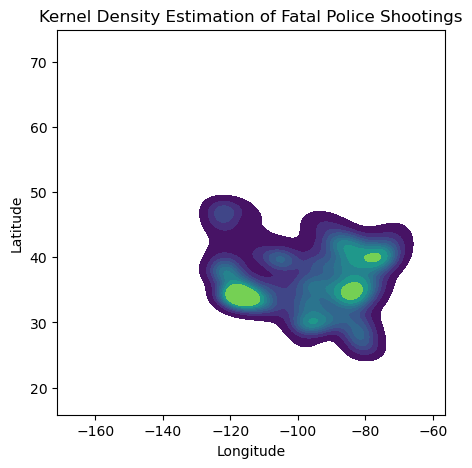

In [56]:
import seaborn as sns

# Assuming df is your DataFrame with longitude and latitude columns
plt.figure(figsize=(5, 5))
sns.kdeplot(data=df, x='longitude', y='latitude', cmap='viridis', fill=True)
plt.title('Kernel Density Estimation of Fatal Police Shootings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_20652\1730649531.py:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


Random Forest Accuracy: 0.9968769519050593
Random Forest Confusion Matrix:
[[   0    5]
 [   0 1596]]


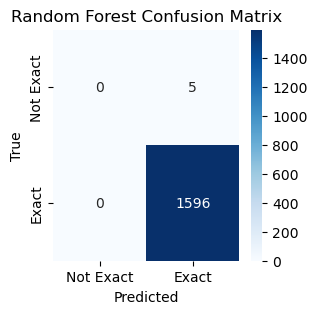

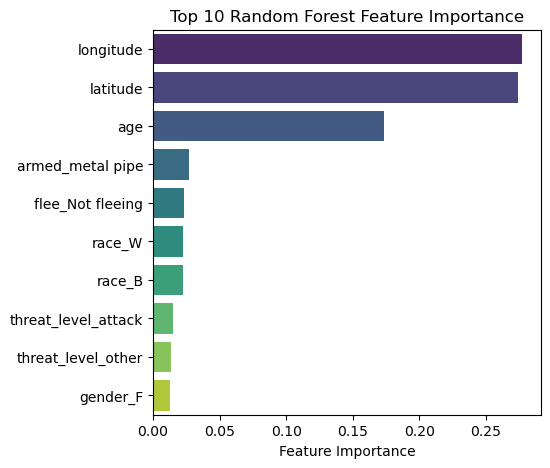

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
excel_file_path = 'C:/Users/Hp/Downloads/fatal-police-shootings-data (4).xls'  # Replace with the actual path to your Excel file
df= pd.read_excel(excel_file_path)

# Assuming df is your DataFrame
# Drop unnecessary columns for this example
df = df.drop(['id', 'name', 'date', 'city', 'state'], axis=1)

# Handle missing values by filling them with the mean value for numerical columns
df = df.fillna(df.mean())

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['manner_of_death', 'armed', 'gender', 'race', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera'])

# Split the data into features (X) and target variable (y)
X = df.drop('is_geocoding_exact', axis=1)
y = df['is_geocoding_exact']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Confusion Matrix:\n{conf_matrix_rf}")

# Plot the Random Forest confusion matrix
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exact', 'Exact'], yticklabels=['Not Exact', 'Exact'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Number of top features to display
top_n = 10

# Get the indices of the top N features
top_feature_indices = feature_importances.argsort()[-top_n:][::-1]
top_feature_importances = feature_importances[top_feature_indices]
top_features = X.columns[top_feature_indices]

# Plot the top N features
plt.figure(figsize=(5, 5))
sns.barplot(x=top_feature_importances, y=top_features, orient='h', palette='viridis')
plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Random Forest Feature Importance')
plt.show()








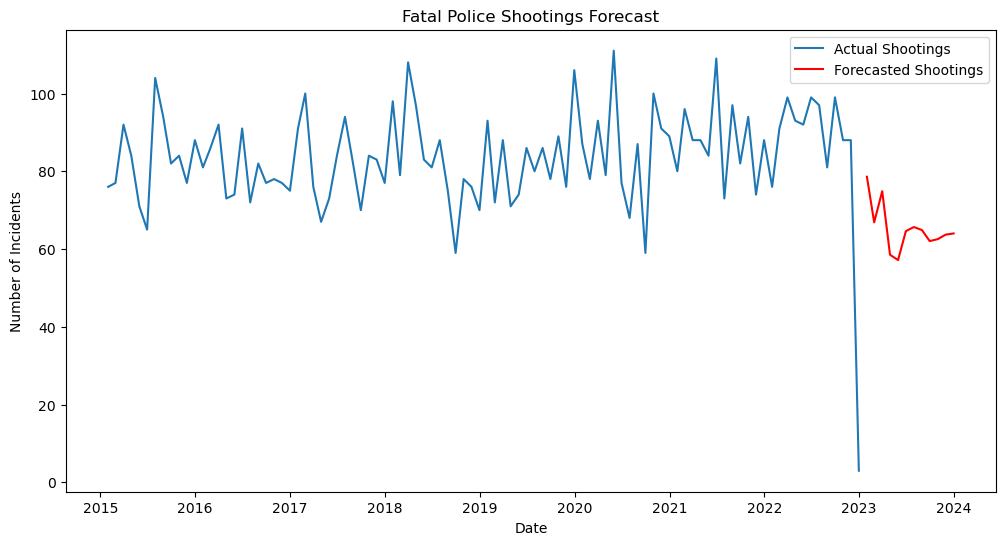

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

# Load the dataset from Excel
excel_file_path = 'C:/Users/Hp/Downloads/fatal-police-shootings-data (4).xls'  # Replace with the actual path to your Excel file
df = pd.read_excel(excel_file_path)

# Preprocess the data
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Resample the data to get the count of shootings per month
monthly_shootings = df.resample('M').size()

# Fit ARIMA model
model = ARIMA(monthly_shootings, order=(5, 1, 0))  # You can adjust the order based on model diagnostics
model_fit = model.fit()

# Forecast future shootings
future_steps = 12  # You can adjust the number of future steps
forecast = model_fit.get_forecast(steps=future_steps)
forecast_index = pd.date_range(start=monthly_shootings.index[-1] + timedelta(days=30), periods=future_steps, freq='M')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(monthly_shootings.index, monthly_shootings, label='Actual Shootings')
plt.plot(forecast_index, forecast.predicted_mean, color='red', label='Forecasted Shootings')
plt.title('Fatal Police Shootings Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()


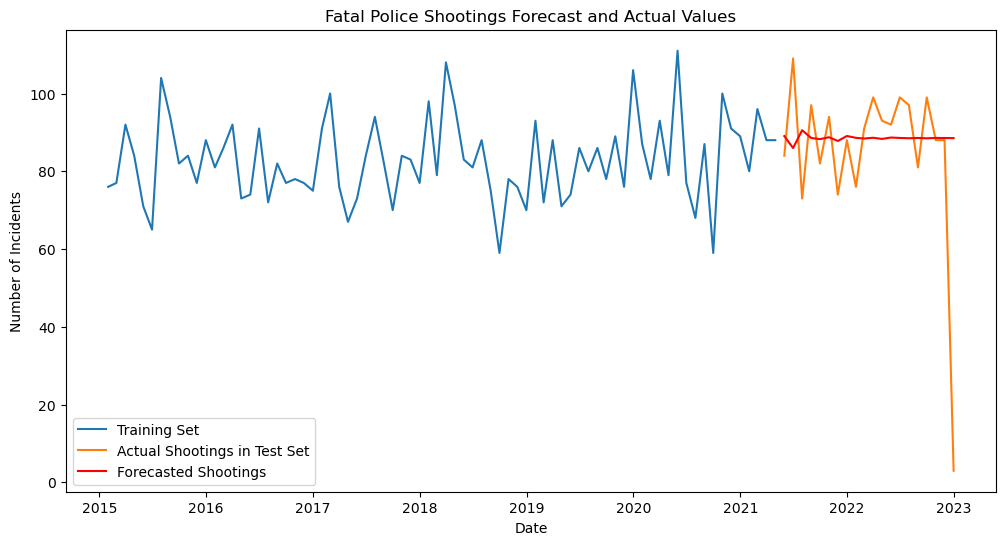

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

# Load the dataset from Excel
excel_file_path = 'C:/Users/Hp/Downloads/fatal-police-shootings-data (4).xls'  # Replace with the actual path to your Excel file
df = pd.read_excel(excel_file_path)

# Preprocess the data
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Resample the data to get the count of shootings per month
monthly_shootings = df.resample('M').size()

# Split the data into training and testing sets
train_size = int(len(monthly_shootings) * 0.8)
train, test = monthly_shootings[0:train_size], monthly_shootings[train_size:]

# Fit ARIMA model on the training set
model = ARIMA(train, order=(5, 1, 0))  # You can adjust the order based on model diagnostics
model_fit = model.fit()

# Forecast future shootings on the testing set
future_steps = len(test)
forecast = model_fit.get_forecast(steps=future_steps)
forecast_index = pd.date_range(start=test.index[0], periods=future_steps, freq='M')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Set')
plt.plot(test.index, test, label='Actual Shootings in Test Set')
plt.plot(forecast_index, forecast.predicted_mean, color='red', label='Forecasted Shootings')
plt.title('Fatal Police Shootings Forecast and Actual Values')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()


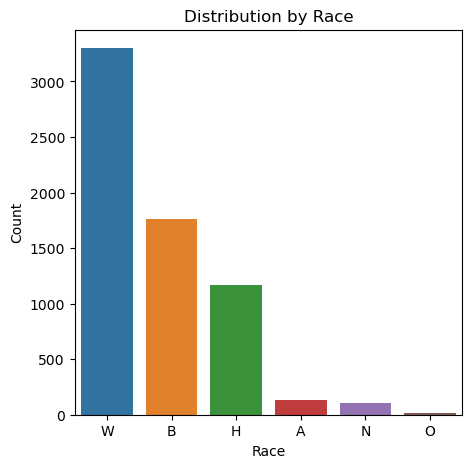

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
excel_file_path = 'C:/Users/Hp/Downloads/fatal-police-shootings-data (4).xls'  # Replace with the actual path to your Excel file
df= pd.read_excel(excel_file_path)
# Distribution by race
plt.figure(figsize=(5, 5))
sns.countplot(x='race', data=df, order=df['race'].value_counts().index)
plt.title('Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()



In [63]:
excel_file_path = 'C:/Users/Hp/Downloads/fatal-police-shootings-data (4).xls'  # Replace with the actual path to your Excel file
df= pd.read_excel(excel_file_path)
race_counts = df['race'].value_counts()

# Display the counts
print(race_counts)

W    3300
B    1766
H    1166
A     129
N     105
O      19
Name: race, dtype: int64
